### 선형회귀분석 오류
#### 곤충질량에 따라 암수구분하는 모델 생성
+ 0 : 암컷
+ 1 : 수컷

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix

In [26]:
wght = [1.94,1.67,0.92,1.11,1.41,1.65,2.28,0.47,1.07,2.19,2.08,1.02,0.91,1.16,1.46,1.02,0.85,0.89,1.79,1.89,0.75,0.9,1.87,0.5,0.69,1.5,0.96,0.53,1.21,0.6]
spcs = [1,1,0,0,1,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,1,0,0,1,1,0,1,0]

In [7]:
df = pd.DataFrame()
df['wght'] = wght
df['spcs'] = spcs 

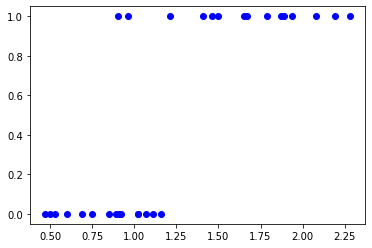

In [9]:
plt.plot(df.wght, df.spcs, 'bo')

In [18]:
X = df.wght   
y = df.spcs 

In [19]:
X = np.array(X).reshape(-1,1)
lrclf = LinearRegression()
lrclf.fit(X, y)
pred = lrclf.predict(X)

In [23]:
a = lrclf.coef_
b = lrclf.intercept_
print('%.2f' % a, '%.2f' % b)

0.75 -0.43


In [21]:
rmse = np.sqrt(mean_squared_error(y, pred))
r2 = r2_score(y, pred)
print(rmse,r2)

0.3106178929591639 0.6140660982944375


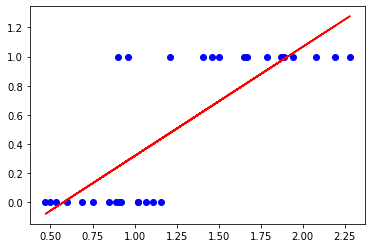

In [22]:
z = lrclf.predict(X)
plt.plot(X,y, 'bo')
plt.plot(X,z, 'r-')

### 종속변수가 범주형인 경우
+ 선형방정식은 이항분포를 따르는 데이터에 적용하기에 다소 맞지 않음
    - ### $ y = ax + b $
+ 위 사례에서 우변값의 범위는 '-무한대 ~ +무한대', 좌변값의 범위는 '0~1'
+ 따라서 좌변값의 범위를 우변과 동일하게 '-무한대 ~ +무한대'로 하려면 적절한 변환함수 필요
    - 로짓함수를 이용해서 변환함
    - ### $ f(x) = \frac {1} {1 + e^{-x}} $

### 로짓(Logit)함수 정의

In [46]:
def logistic(x, w):
    yy = 1 / (1 + np.exp(-(w[0]*x + w[1])))
    return yy

#### 로짓함수를 이용해 그래프 그리기

In [49]:
W = [8, -10]  # 기울기와 절편을 임의로 설정
xx = np.linspace(0.5, 2.25, 50)  # 0.5 ~2.25내 50개 값 생성
yy = logistic(xx, W)

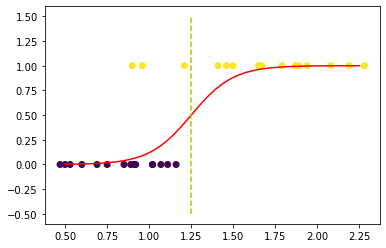

In [51]:
plt.scatter(pd.Series(wght), pd.Series(spcs), c=spcs)
plt.plot(xx.reshape(-1,1), yy, 'r-')
# 결정경계 표시 (yy가 0.5 이상 되는 지점)
i = np.min(np.where(yy >= 0.5))
xp = (xx[i])
plt.plot([xp,xp],[-.5,1.5], 'y--')

#### 결정경계 표시 (yy가 0.5 이상 되는 지점 알아냄)


#### sklearn에서 제공하는 LogisticRegression으로 분석하기

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
X = np.array(wght).reshape(-1,1)
y = spcs

#### solver : sklearn 20.x 이상부터는 명시적 지정 필요
+ liblinear : 이항회귀, 비교적 작은 데이터셋에 적합
+ lbfgs, newton-g : 다항회귀, L1제약
+ sag, saga : 다항회귀, L2제약, 확률적경사하강법 사용

#### multi_class = 'multinomial' 다항회귀 설정

In [78]:
lrclf = LogisticRegression(solver='liblinear')
lrclf.fit(X,y)
pred = lrclf.predict(X)

In [79]:
accuracy_score(y, pred)

0.8666666666666667

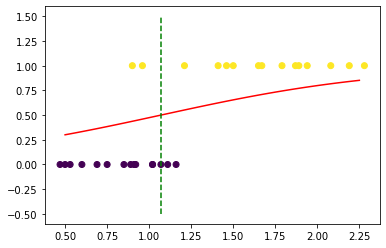

In [81]:
plt.scatter(X, y, c=y)
xx = np.linspace(0.5, 2.25, 50).reshape(-1,1)
yy = lrclf.predict_proba(xx)  # 0, 1 일 확률
plt.plot(xx, yy[:, 1], 'r-') 
# 결정경계 표시
i = np.min(np.where(yy[:, 1] >= 0.5))
xp = (xx[i])
plt.plot([xp,xp],[-0.5,1.5], 'g--')

In [82]:
print("임계값 :", xp)

임계값 : [1.07142857]


In [83]:
rmse = np.sqrt(mean_squared_error(y, pred))
r2 = r2_score(y, pred)
print(rmse,r2)

0.3651483716701107 0.4666666666666667


### iris 데이터셋을 이용한 로지스틱 회귀
+ 4+1 변수, 150개 데이터로 구성
+ 결과값은 3가지 : setosa, versicolor, verginica

#### 꽃잎너비, 레이블이 verginica인 경우에 대한 경계값 알아보기

In [84]:
from sklearn.datasets import load_iris

In [85]:
iris = load_iris()

In [88]:
Xtrain, Xtest, ytrain, ytest = train_test_split(iris.data, iris.target, train_size=0.3, stratify = iris.target, random_state=2111091510)

In [97]:
lrclf = LogisticRegression(solver='sag', multi_class='multinomial', C=0.01)
lrclf.fit(Xtrain,ytrain)
pred = lrclf.predict(Xtest)

In [98]:
accuracy_score(ytest, pred)

0.7904761904761904

In [102]:
X = iris.data[:, 3] # petal width
y = (iris.target == 2).astype(int)

In [107]:
np.min(X), np.max(X)

(0.1, 2.5)

In [109]:
lrclf =LogisticRegression(solver='liblinear')
lrclf.fit(X.reshape(-1,1), y)

LogisticRegression(solver='liblinear')

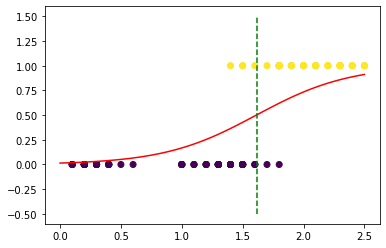

In [117]:
plt.scatter(X, y, c=y)
xx = np.linspace(0, 2.5, 100).reshape(-1,1)
yy = lrclf.predict_proba(xx) 
plt.plot(xx, yy[:, 1], 'r')
# 임계값(결정경계) 확인
i = np.min(np.where(yy[:, 1] >= 0.5))
xp = (xx[i])
plt.plot([xp,xp],[-0.5,1.5], 'g--')

In [116]:
print("임계값 :", xp)

임계값 : [1.61616162]


### 결정경계 시각화
+ iris의 feature를 2개로 나눠 재학습
+ 시각화를 위해 두 변수만 지정

In [139]:
data = iris.data[:, :2] # Sepal 속성만
# data = iris.data[:, 2:] # Petal 속성만
target = iris.target

In [140]:
lrclf =LogisticRegression(solver='lbfgs')
lrclf.fit(data, target)
print(lrclf.score(data,target))  # 훈련정확도

0.82


#### pcolormesh 함수 사용시 필요

In [150]:
plt.rcParams['pcolor.shading'] = 'nearest'

#### 다항로지스틱 결정경계 시각화

In [151]:
x_min = data[:,0].min() - 0.5 # x측 최대/최소
x_max = data[:,0].max() + 0.5
y_min = data[:,0].min() - 0.5 # y축 최대/최소
y_max = data[:,0].max() + 0.5

#### x/y 축 범위의 값들 생성

In [152]:
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)

#### 생성한 값들을 x,y 쌍으로 좌표평면에 배치
+ 즉, 예측값을 출력할 좌표평면을 정의함

In [153]:
xx, yy = np.meshgrid(xm, ym) 
xx[:1]

array([[3.8 , 3.82, 3.84, 3.86, 3.88, 3.9 , 3.92, 3.94, 3.96, 3.98, 4.  ,
        4.02, 4.04, 4.06, 4.08, 4.1 , 4.12, 4.14, 4.16, 4.18, 4.2 , 4.22,
        4.24, 4.26, 4.28, 4.3 , 4.32, 4.34, 4.36, 4.38, 4.4 , 4.42, 4.44,
        4.46, 4.48, 4.5 , 4.52, 4.54, 4.56, 4.58, 4.6 , 4.62, 4.64, 4.66,
        4.68, 4.7 , 4.72, 4.74, 4.76, 4.78, 4.8 , 4.82, 4.84, 4.86, 4.88,
        4.9 , 4.92, 4.94, 4.96, 4.98, 5.  , 5.02, 5.04, 5.06, 5.08, 5.1 ,
        5.12, 5.14, 5.16, 5.18, 5.2 , 5.22, 5.24, 5.26, 5.28, 5.3 , 5.32,
        5.34, 5.36, 5.38, 5.4 , 5.42, 5.44, 5.46, 5.48, 5.5 , 5.52, 5.54,
        5.56, 5.58, 5.6 , 5.62, 5.64, 5.66, 5.68, 5.7 , 5.72, 5.74, 5.76,
        5.78, 5.8 , 5.82, 5.84, 5.86, 5.88, 5.9 , 5.92, 5.94, 5.96, 5.98,
        6.  , 6.02, 6.04, 6.06, 6.08, 6.1 , 6.12, 6.14, 6.16, 6.18, 6.2 ,
        6.22, 6.24, 6.26, 6.28, 6.3 , 6.32, 6.34, 6.36, 6.38, 6.4 , 6.42,
        6.44, 6.46, 6.48, 6.5 , 6.52, 6.54, 6.56, 6.58, 6.6 , 6.62, 6.64,
        6.66, 6.68, 6.7 , 6.72, 6.74, 

In [154]:
yy[:1]

array([[3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8,
        3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8, 3.8

#### 작업 시각화

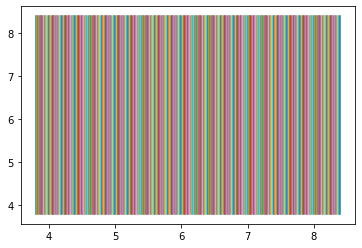

In [155]:
plt.plot(xx, yy)
plt.show()

#### 위에서 만든 x,y쌍을 모델을 통해 예측함
+ pcolormesh : 내장된 칼라맵을 통해 지정한 위치에 히트맵을 그려주는 함수
+ pcolormesh(x좌표, y좌표, 색상값, 칼라맵)

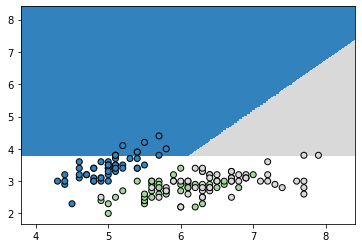

In [159]:
results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
results = results.reshape(xx.shape)
plt.pcolormesh(xx,yy, results, cmap=plt.cm.tab20c)
# 원본 데이터를 산점도에 표시
plt.scatter(data[:,0], data[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
plt.show()

In [160]:
data2 = iris.data[:, 2:] # Petal 속성만

In [161]:
lrclf =LogisticRegression(solver='lbfgs')
lrclf.fit(data2, target)
print(lrclf.score(data2,target)) 

0.9666666666666667


In [162]:
plt.rcParams['pcolor.shading'] = 'nearest'

In [163]:
x_min = data2[:,0].min() - 0.5 # x측 최대/최소
x_max = data2[:,0].max() + 0.5
y_min = data2[:,0].min() - 0.5 # y축 최대/최소
y_max = data2[:,0].max() + 0.5

In [164]:
xm = np.arange(x_min, x_max, 0.02)
ym = np.arange(y_min, y_max, 0.02)

In [165]:
xx, yy = np.meshgrid(xm, ym) 
xx[:1]

array([[0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 ,
        0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92,
        0.94, 0.96, 0.98, 1.  , 1.02, 1.04, 1.06, 1.08, 1.1 , 1.12, 1.14,
        1.16, 1.18, 1.2 , 1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36,
        1.38, 1.4 , 1.42, 1.44, 1.46, 1.48, 1.5 , 1.52, 1.54, 1.56, 1.58,
        1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 , 1.72, 1.74, 1.76, 1.78, 1.8 ,
        1.82, 1.84, 1.86, 1.88, 1.9 , 1.92, 1.94, 1.96, 1.98, 2.  , 2.02,
        2.04, 2.06, 2.08, 2.1 , 2.12, 2.14, 2.16, 2.18, 2.2 , 2.22, 2.24,
        2.26, 2.28, 2.3 , 2.32, 2.34, 2.36, 2.38, 2.4 , 2.42, 2.44, 2.46,
        2.48, 2.5 , 2.52, 2.54, 2.56, 2.58, 2.6 , 2.62, 2.64, 2.66, 2.68,
        2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 , 2.82, 2.84, 2.86, 2.88, 2.9 ,
        2.92, 2.94, 2.96, 2.98, 3.  , 3.02, 3.04, 3.06, 3.08, 3.1 , 3.12,
        3.14, 3.16, 3.18, 3.2 , 3.22, 3.24, 3.26, 3.28, 3.3 , 3.32, 3.34,
        3.36, 3.38, 3.4 , 3.42, 3.44, 

In [166]:
yy[:1]

array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

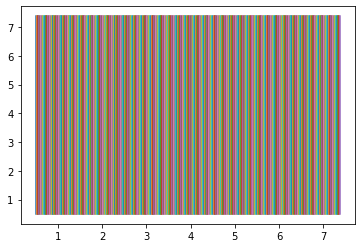

In [167]:
plt.plot(xx, yy)
plt.show()

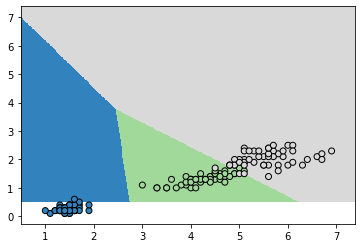

In [168]:
results = lrclf.predict(np.c_[xx.ravel(), yy.ravel()])
results = results.reshape(xx.shape)
plt.pcolormesh(xx,yy, results, cmap=plt.cm.tab20c)
# 원본 데이터를 산점도에 표시
plt.scatter(data2[:,0], data2[:,1], c=target, cmap=plt.cm.tab20c, edgecolors='k')
plt.show()

#### 결정영역 시각화 관련 파일 mldlpy3.py

In [169]:
import mldlpy3

/home/hadoop/mldlpy3.py:29: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  edgecolors='k')


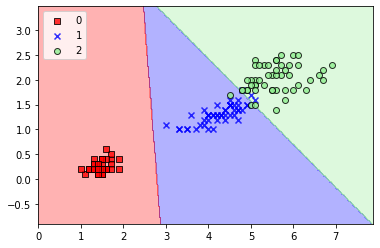

In [171]:
mldlpy3.plot_decision_regions(data2, target, lrclf)